# Zadanie 1

Za pomoca funkcji 

```python
sklearn.datasets.make_moons
```

wygeneruj 4 zbiory danych z parametrami:

  * n_samples=1000, noise=.05
  * n_samples=1000, noise=.3
  * n_samples=200, noise=.05
  * n_samples=200, noise=.3


In [28]:
import numpy as np
import sklearn.datasets

#low noise, plenty of samples, should be easy
X, y = sklearn.datasets.make_moons(n_samples=1000, noise=.05)

X1, y1 = sklearn.datasets.make_moons(n_samples=1000, noise=.3)
X2, y2 = sklearn.datasets.make_moons(n_samples=200, noise=.05)
X3, y3 = sklearn.datasets.make_moons(n_samples=200, noise=.3)

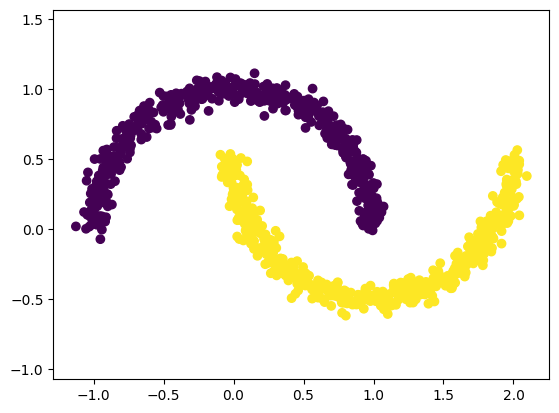

In [29]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y)
plt.axis('equal')
plt.show()

# Zadanie 2

Do równania prostej w postaci ogólnej

$$
Ax + By + C = 0
$$

łatwo znaleść współrzedne wektora prostopadłego do wykresu

$$
W = [A,B].
$$

Łatwo policzyć, że dla funkcji

$$
y = ax+b
$$

mamy

$$
A=-a, B=1, C=-b
$$

Dla danych z poprzedniego zadania narysuj dowolna prosta przchodzcą przez środek układu współrzednych i dokonaj klasyfikacji.
Dane po lewej stronie mają być oznaczone jako -1 a prawej jako +1. Użyj iloczynu skalarnego oraz wektora normalnego do prostej.

Narysuj odpowiedni rysunek.

In [30]:
a=1
b=.5

A= -a
B= 1
C= -b

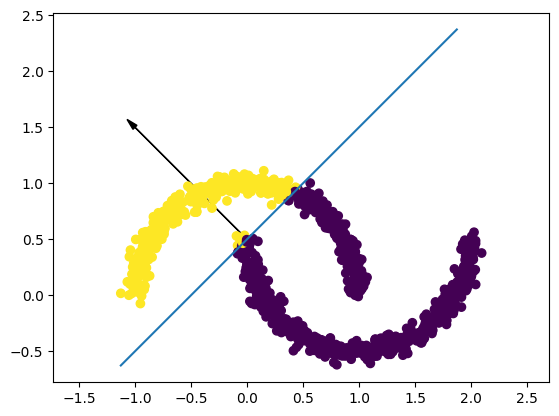

In [31]:
x = np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.5)
yx = a*x+b
plt.arrow(0, b, A, B, head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.plot(x, yx)

y_cl=np.sign(np.dot( X, np.array([A,B]))+C)
y_cl[y_cl==-1]=0   

plt.scatter(X[:, 0], X[:, 1], c=y_cl)
plt.axis('equal')
plt.show()

In [32]:
class fixed_plan(object):
    """
    """
    def __init__(self, a=0.5, b=0):
        self.a=a
        self.b=b

        self.A=-self.a
        self.B=1
        self.C=-self.b

    def fit(self, X, y):
        return self
    
    def predict(self, X):
        """Return class label after unit step"""
        y_cl=np.sign(np.dot( X, np.array([self.A,self.B]))+self.C) 
        y_cl[y_cl==-1]=0
        return y_cl 

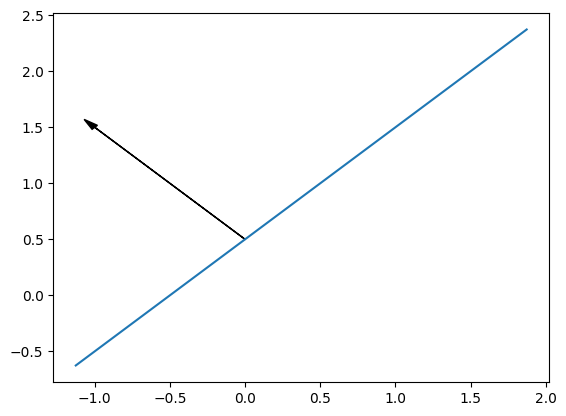

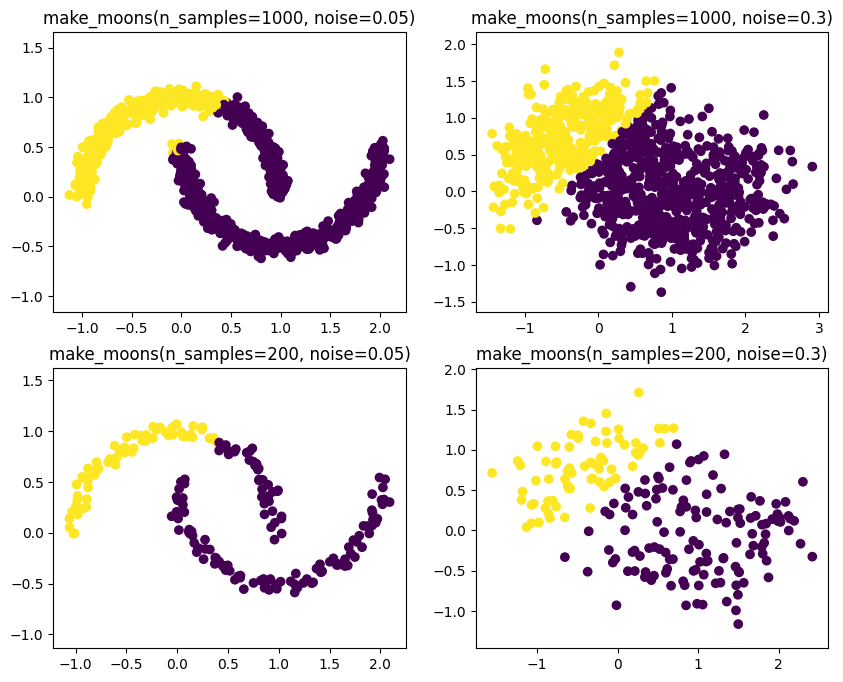

In [33]:
x = np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.5)
yx = a*x+b
plt.arrow(0, b, A, B, head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.plot(x, yx)

y_cl=np.sign(np.dot( X, np.array([A,B]))+C)
y_cl[y_cl==-1]=0   

y_cl1=np.sign(np.dot( X1, np.array([A,B]))+C)
y_cl1[y_cl1==-1]=0   

y_cl2=np.sign(np.dot( X2, np.array([A,B]))+C)
y_cl2[y_cl2==-1]=0   

y_cl3=np.sign(np.dot( X3, np.array([A,B]))+C)
y_cl3[y_cl3==-1]=0   

plt.figure(figsize=(10, 8))

# Plot the first dataset (X, y)
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_cl, cmap='viridis')
plt.title("make_moons(n_samples=1000, noise=0.05)")
plt.axis('equal')

# Plot the second dataset (X1, y1)
plt.subplot(222)
plt.scatter(X1[:, 0], X1[:, 1], c=y_cl1, cmap='viridis')
plt.title("make_moons(n_samples=1000, noise=0.3)")
plt.axis('equal')

# Plot the third dataset (X2, y2)
plt.subplot(223)
plt.scatter(X2[:, 0], X2[:, 1], c=y_cl2, cmap='viridis')
plt.title("make_moons(n_samples=200, noise=0.05)")
plt.axis('equal')

plt.subplot(224)
plt.scatter(X3[:, 0], X3[:, 1], c=y_cl3, cmap='viridis')
plt.title("make_moons(n_samples=200, noise=0.3)")
plt.axis('equal')
plt.show()


# Zadanie 3
Predykcji można dokonać dla dowolnego punktu na płaszczyźnie. Wygeneruj punkty równomiernie na kwadracie zawierającym punkty i wykonaj dla nich predykcję.

Oryginalny zbiór danych niech będzie pokolorowany za pomocą oryginalnych klas. Narysuj wszystko na jednym wykresie.

In [34]:

from mlxtend.plotting import plot_decision_regions

<Axes: >

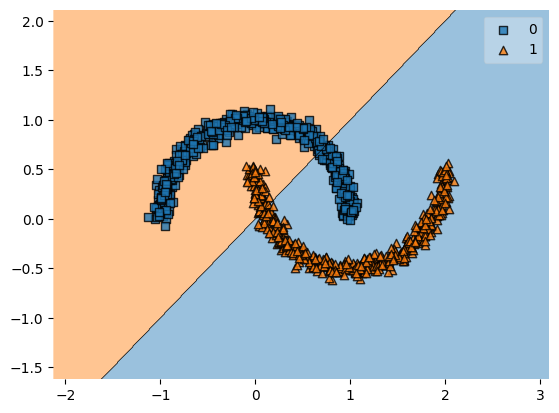

In [35]:
classifier=fixed_plan(a=1,b=0)
classifier.fit(X,y)
plot_decision_regions(X, y, classifier)

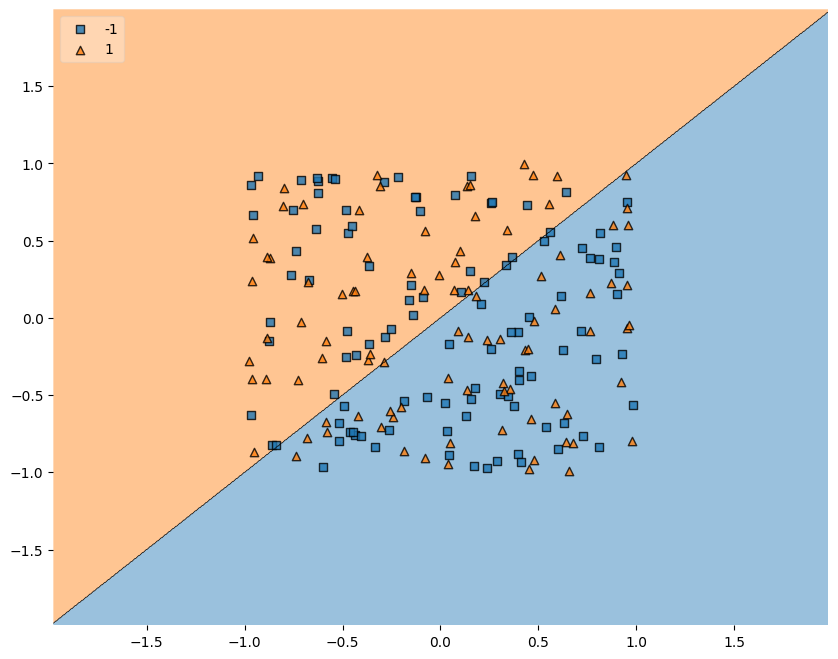

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions




np.random.seed(0) 
X = np.random.rand(200, 2) * 2 - 1  
y = np.random.choice([-1, 1], size=200) 


classifier = fixed_plan(a=1, b=0)

classifier.fit(X, y)

plt.figure(figsize=(10, 8))
plot_decision_regions(X, y, clf=classifier, legend=2)
plt.show()
